In [2]:
# %%
# import the necessary libraries: 

import kagglehub
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [214]:
#------------ get the data -------------

# Download latest version
path = kagglehub.dataset_download("mrsimple07/energy-consumption-prediction")

print("Path to dataset files:", path)

#check the directory
print(os.listdir(path))

data = pd.read_csv(os.path.join(path, "Energy_consumption.csv"))

Path to dataset files: /Users/cholponzhakshylykova/.cache/kagglehub/datasets/mrsimple07/energy-consumption-prediction/versions/1
['Energy_consumption.csv']


In [180]:
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek',
       'EnergyConsumption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.3+ KB
9
Initial date: 2022-01-01 00:00:00
End date: 2022-02-11 1

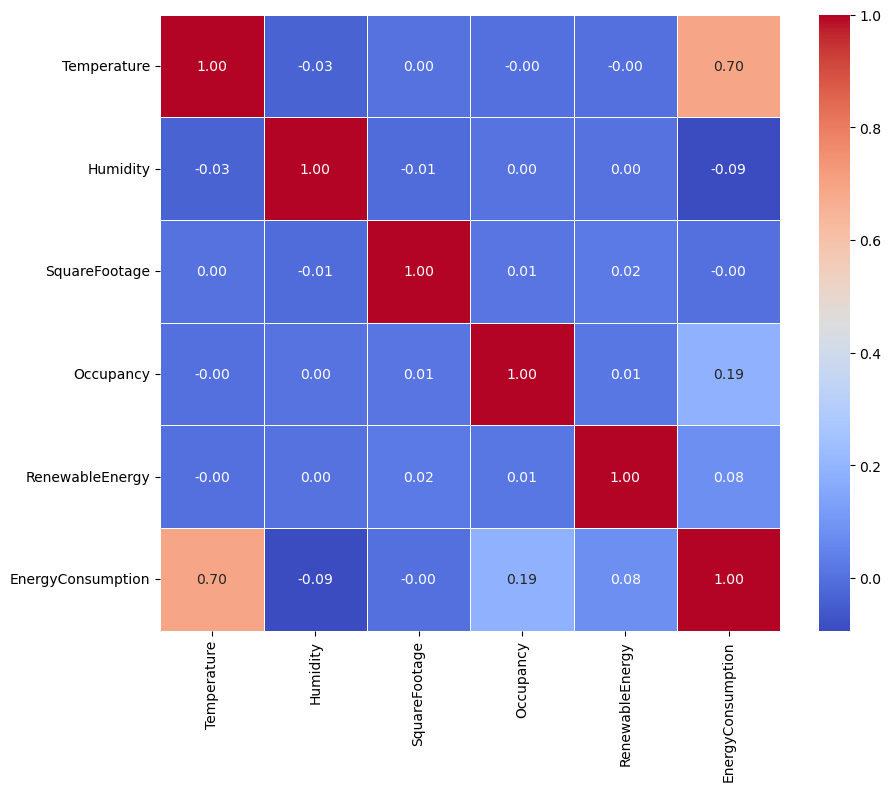

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 78.1+ KB


<Figure size 640x480 with 0 Axes>

In [139]:
#------------EDA-------------------------


data.head(10)


data.head(10)
'''Same dates are asigned as a holiday and non-holiday, therefore I will drop the columns [Holiday] [DayOfWeek]'''


data.drop(["Holiday"], axis = 1, inplace=True)
print(data.columns)


#convert the "Timestamp" column to datetime
#The to_datetime() function is used to convert argument to datetime.

#data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data.describe()
data.info()
'''
DatetimeIndex: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
'''

#set timestamp as index
data.set_index("Timestamp", inplace=True) #keep the indexed timestamp as a column

print(len(data.columns))
'''10 columns'''


#find the initial and the end date

print(f"Initial date: {data.index.min()}")
print(f"End date: {data.index.max()}")

#since the data is all synthetic it is okay to experiment with all the possible ways to analyze the data. 


#correlation analysis
# %%
numeric_data = data.select_dtypes(include=["int64", "float64"]).columns
corr = data[numeric_data].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot= True, cmap="coolwarm", fmt = ".2f", cbar = True, linewidths = 0.5)
plt.show()
plt.savefig("correlation_matrix.png", dpi = 300, bbox_inches = "tight")

# there is a strong correlation for of Temperature with Energyconsumption
# %%

data.info()

In [161]:

# Dealing with categorical Data
# ANOVA Test for the categorical variables. 
# NO need to normalize the energyconsumption when using ANOVA

import pandas as pd
from scipy import stats

X = data[["HVACUsage","LightingUsage", "DayOfWeek"]]
y = data["EnergyConsumption"]

#apply ANOVA
anova_result_hvac = stats.f_oneway(y[X["HVACUsage"] == "On"], y[X["HVACUsage"] == "Off"])

print("ANOVA result for HVACusage (On vs Off)")
print(f"F-statistics, {anova_result_hvac.statistic:.5f}")
print(f"F-statistics, {anova_result_hvac.pvalue:.5f}")


#apply ANOVA
anova_result_Lighting = stats.f_oneway(y[X["LightingUsage"] == "On"], y[X["LightingUsage"] == "Off"])

print("ANOVA result for LightingUsage (On vs Off)")
print(f"F-statistics, {anova_result_Lighting.statistic:.5f}")
print(f"F-statistics, {anova_result_Lighting.pvalue:.5f}")


#apply ANOVA on DayOfWeek

#apply ANOVA
anova_result_day = stats.f_oneway(y[X["DayOfWeek"] == "Monday"], y[X["DayOfWeek"] == "Tuesday"], y[X["DayOfWeek"] == "Wednesday"],
                                       y[X["DayOfWeek"] == "Thursday"], y[X["DayOfWeek"] == "Friday"], y[X["DayOfWeek"] == "Saturday"],
                                       y[X["DayOfWeek"] == "Sunday"])
                                      

print("ANOVA result for LightingUsage (On vs Off)")
print(f"F-statistics, {anova_result_day.statistic:.5f}")
print(f"F-statistics, {anova_result_day.pvalue:.5f}")


ANOVA result for HVACusage (On vs Off)
F-statistics, 89.21920
F-statistics, 0.00000
ANOVA result for LightingUsage (On vs Off)
F-statistics, 8.78716
F-statistics, 0.00311
ANOVA result for LightingUsage (On vs Off)
F-statistics, 0.31565
F-statistics, 0.92902


- Mean EnergyConsumption for HVACUsage ON is significantly different to those with HVACUsage Off
- Mean EnergyConsumption for Lighting ON is significantly different to those with Lighting Off
- Mean EnergyConsumption does not differ accross differend days of week

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 110.4+ KB


### Outlier Detection 

array(['Monday', 'Saturday', 'Sunday', 'Wednesday', 'Friday', 'Thursday',
       'Tuesday'], dtype=object)

## Visualizations

In [170]:
# Time series

In [216]:
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import numpy as np

# for this use the data without indexation of the datetime: 

data["TimeStamp"] = pd.to_datetime(data["Timestamp"])

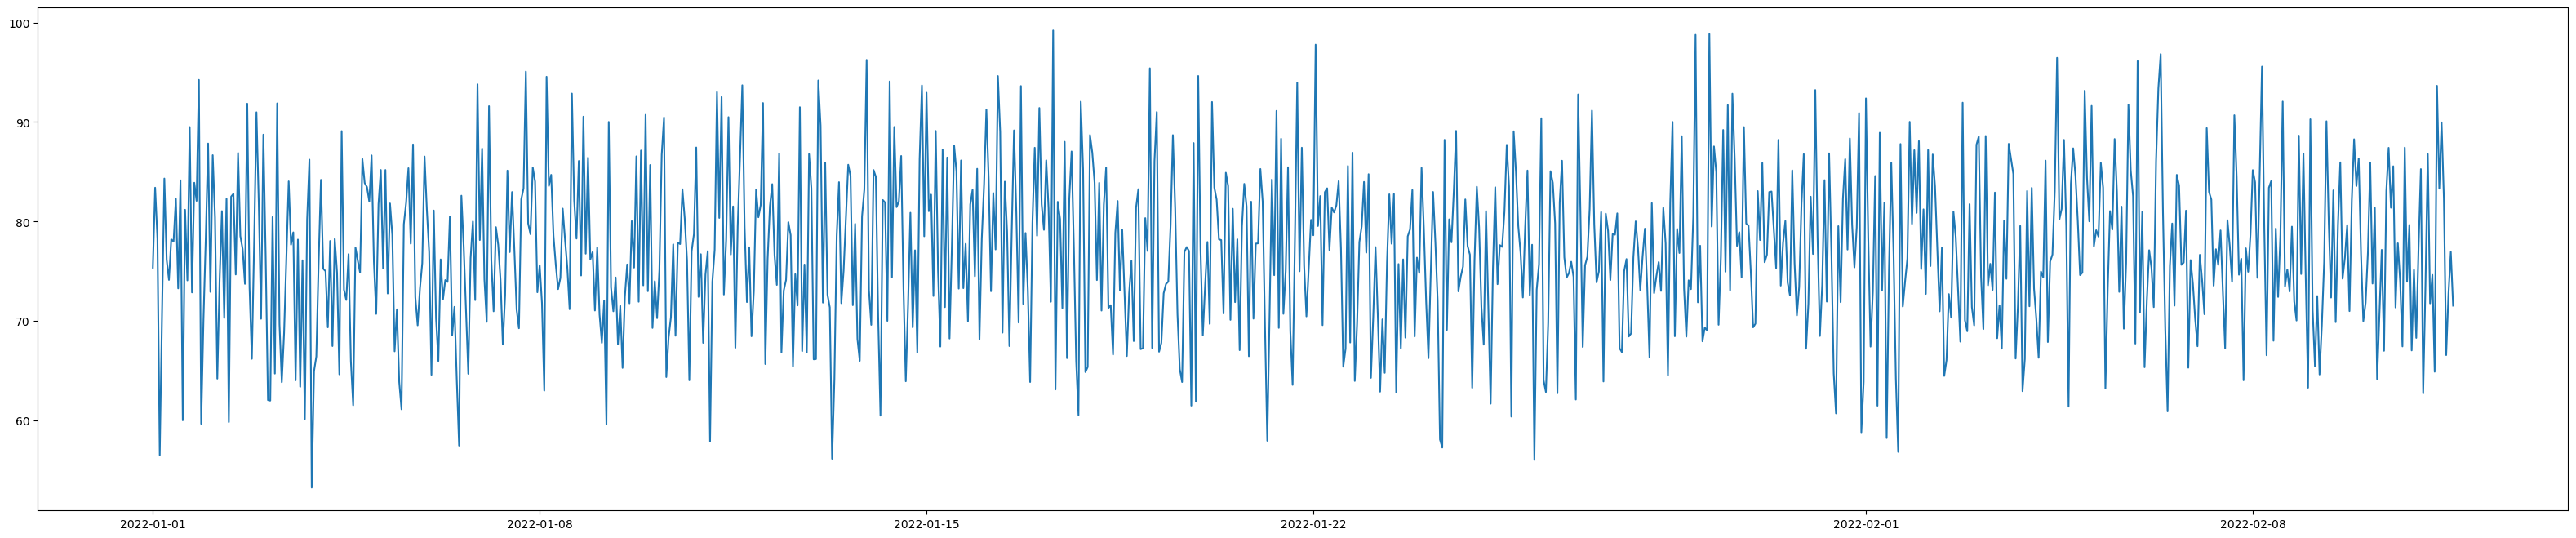

In [228]:
plt.figure(figsize = (40,8))

plt.plot(data["TimeStamp"], data["EnergyConsumption"])
plt.title("Energy Consumption over the whole dataset")

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,TimeStamp
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,2022-01-01 00:00:00
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,2022-01-01 01:00:00
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2022-01-01 02:00:00
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,2022-01-01 03:00:00
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,2022-01-01 04:00:00
